# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, ConfusionMatrixDisplay,recall_score, f1_score, classification_report, confusion_matrix, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.svm import SVC
from catboost import CatBoostClassifier



**READING IN THE DATASET**

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\diabetes.xls')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.to_csv(r'C:\Users\USER\Desktop\diabetes2.csv', index=False)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**SHAPE OF DATASET**


In [5]:
df.shape


(768, 9)

**DISTRIBUTION OF TARGET COLUMN**

In [6]:
df['Outcome'].value_counts(normalize=True)


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

**CORRELATION MATRIX**

<Axes: >

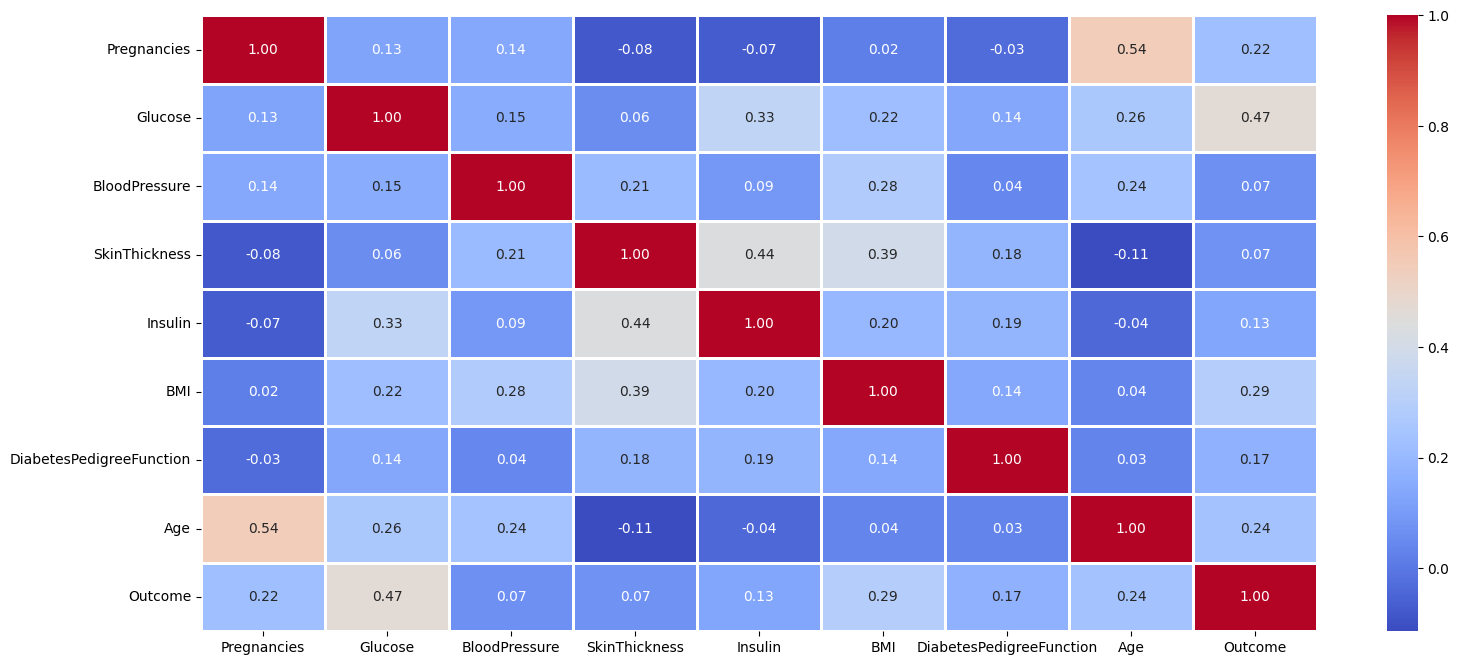

In [7]:
dcorr = df.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(dcorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8)


**SPLITTING THE DATASET**

In [3]:
X = df.drop(columns=['Outcome'], axis=1) # predictor variables
y = df['Outcome']   # target variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) # splitting the training and testing set


print(X.shape)
print(y.shape)
X_train.head()



(768, 8)
(768,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
209,7,184,84,33,0,35.5,0.355,41
176,6,85,78,0,0,31.2,0.382,42
147,2,106,64,35,119,30.5,1.400,34
454,2,100,54,28,105,37.8,0.498,24
636,5,104,74,0,0,28.8,0.153,48


**DUE TO SOMEW OF THE MODEL ARE SENSITIVE I DECIDED TO SCALE THE DATASET USING STANDARD SCALER**

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pickle.dump(scaler, open('scaler.pkl', 'wb'))  # saving the scaler model


**IMPLEMENTED 4 DIFFERENT MODELS TO CHECK WHICH MODEL IS BEST**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# --------------------------------------------------------------
#  Logistic Regression
# --------------------------------------------------------------
lr = LogisticRegression(
    penalty='l2',             # Regularization type
    C=1.0,                    # Regularization strength
    solver='lbfgs',           # Optimization algorithm
    max_iter=1000,            # Max iterations for convergence
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# --------------------------------------------------------------
#  K-Nearest Neighbors
# --------------------------------------------------------------
knn = KNeighborsClassifier(
    n_neighbors=7,            # Number of neighbors
    weights='uniform',        # Weight function ('uniform' or 'distance')
    algorithm='auto',         # Algorithm to compute nearest neighbors
    leaf_size=30,             # Leaf size for tree-based algorithms
    p=2,                      # Power parameter for Minkowski distance (p=2 → Euclidean)
    metric='minkowski'        # Distance metric
)

# --------------------------------------------------------------
#  Random Forest
# --------------------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=200,         # Number of trees
    max_depth=None,           # Expand until leaves are pure
    min_samples_split=2,      # Minimum samples to split internal node
    min_samples_leaf=1,       # Minimum samples at leaf node
    max_features='sqrt',      # Features to consider at each split
    bootstrap=True,           # Use bootstrap samples
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# --------------------------------------------------------------
#  Decision Tree
# --------------------------------------------------------------
dt = DecisionTreeClassifier(
    criterion='gini',         # Splitting criterion ('gini' or 'entropy')
    splitter='best',          # Split selection strategy ('best' or 'random')
    max_depth=None,           # Maximum depth of tree
    min_samples_split=2,      # Minimum samples to split internal node
    min_samples_leaf=1,       # Minimum samples at leaf node
    max_features=None,        # Number of features considered at each split
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# --------------------------------------------------------------
#  XGBoost
# --------------------------------------------------------------
xgb = XGBClassifier(
    n_estimators=200,         # Number of trees
    max_depth=3,              # Maximum depth of trees
    learning_rate=0.1,        # Step size shrinkage
    subsample=0.8,            # Fraction of samples per tree
    colsample_bytree=0.8,     # Fraction of features per tree
    gamma=0,                  # Minimum loss reduction required for split
    reg_alpha=0,              # L1 regularization
    reg_lambda=1,             # L2 regularization
    scale_pos_weight=1,       # Balancing of positive/negative classes
    use_label_encoder=False,  # Avoid warning in recent XGBoost
    eval_metric='logloss',    # Metric for evaluation
    random_state=42
)

catboost = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=False
)


svm = SVC(
    C=1.0,                    
    kernel='rbf',
    gamma='scale',
    class_weight='balanced',
    probability=True,
    random_state=42
)

# classification models
classifier = [('K nearest neighbor ', knn),
              ('logistic Regression', lr),
              ('Random Forest', rf),
              ('Decision Tree', dt),
              ('XGBoost', xgb),
              ('CatBoost', catboost),
              ('SVM', svm)
              ]

for class_name, classes in classifier :

    # cross validation score
    scores = cross_val_score(classes, X_scaled, y_train, cv=5, scoring='accuracy')
    print("Cross-validated scores:", scores)
    print("Mean Accuracy: {:.2f}".format(scores.mean()))

    # fitting all the classes
    classes.fit(X_scaled, y_train)

   # predicting the test set
    y_pred_tree = classes.predict(X_test_scaled)

    print('{:s} : {:.2f}'.format(class_name,accuracy_score(y_test, y_pred_tree)))


Cross-validated scores: [0.66666667 0.74074074 0.74766355 0.79439252 0.71962617]
Mean Accuracy: 0.73
K nearest neighbor  : 0.75
Cross-validated scores: [0.74074074 0.74074074 0.77570093 0.78504673 0.74766355]
Mean Accuracy: 0.76
logistic Regression : 0.77


Cross-validated scores: [0.73148148 0.74074074 0.76635514 0.77570093 0.72897196]
Mean Accuracy: 0.75
Random Forest : 0.76
Cross-validated scores: [0.65740741 0.75925926 0.68224299 0.61682243 0.71028037]
Mean Accuracy: 0.69
Decision Tree : 0.70


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:43:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:43:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:43:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Cross-validated scores: [0.7037037  0.73148148 0.72897196 0.75700935 0.73831776]
Mean Accuracy: 0.73
XGBoost : 0.74
Cross-validated scores: [0.67592593 0.72222222 0.77570093 0.73831776 0.70093458]
Mean Accuracy: 0.72
CatBoost : 0.75
Cross-validated scores: [0.68518519 0.72222222 0.70093458 0.76635514 0.73831776]
Mean Accuracy: 0.72
SVM : 0.74


**KNEIGHBORS HAPPENS TO HAVE THE BEST ACCURACY AND CROSS VAL SCORE**

Knearest Neighbor - Train Accuracy: 0.76
Knearest Neighbor - Test Accuracy: 0.77
Cross-validated scores: [0.66666667 0.74074074 0.81481481 0.61111111 0.74074074 0.72222222
 0.74074074 0.75471698 0.66037736 0.81132075]
-------------------------
Randlr Forest - Accuracy: 0.77
-------------------------
Random Forest - ROC AUC: 0.75
-------------------------
Random Forest - Precision: 0.65
-------------------------
Random Forest - Recall: 0.72
-------------------------
Random Forest - F1 Score: 0.68
-------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       150
           1       0.65      0.72      0.68        81

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



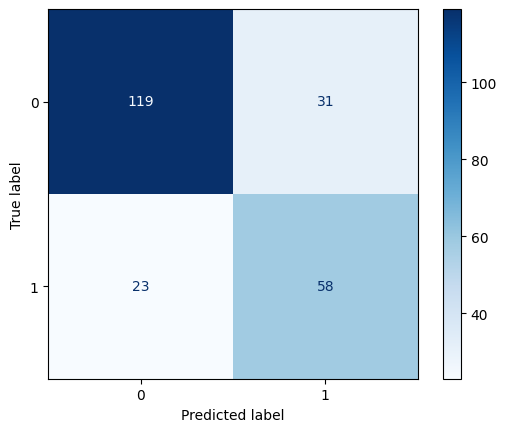

In [16]:
acc_train = lr.score(X_scaled, y_train)  # training set accuracy score
acc_test = lr.score(X_test_scaled, y_test)  # testing set accuracy score

print(f"Knearest Neighbor - Train Accuracy: {acc_train:.2f}")
print(f"Knearest Neighbor - Test Accuracy: {acc_test:.2f}")

# predicting the test set
y_pred = lr.predict(X_test_scaled)


# cross validation score
scores = cross_val_score(classes, X_scaled, y_train, cv=10, scoring='accuracy')
print("Cross-validated scores:", scores)
print('-------------------------')

# Evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred)

roc_auc_tree = roc_auc_score(y_test, y_pred)

precision_tree = precision_score(y_test, y_pred)

recall_tree = recall_score(y_test, y_pred)

f1_tree = f1_score(y_test, y_pred)

print(f"Randlr Forest - Accuracy: {accuracy_tree:.2f}")
print('-------------------------')
print(f"Random Forest - ROC AUC: {roc_auc_tree:.2f}")
print('-------------------------')
print(f"Random Forest - Precision: {precision_tree:.2f}")
print('-------------------------')
print(f"Random Forest - Recall: {recall_tree:.2f}")
print('-------------------------')
print(f"Random Forest - F1 Score: {f1_tree:.2f}")
print('-------------------------')


print("\nClassification Report:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(lr, X_test_scaled, y_test, cmap='Blues')


In [19]:
from sklearn.model_selection import GridSearchCV


**SAVING THE MODEL**

In [40]:
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model1, file)


**FEATURE IMPORTANCE**

                Feature  Coefficient
4            area_worst     1.748255
2          radius_worst     1.599267
1   concave points_mean     1.158843
7       perimeter_worst     1.091206
0  concave points_worst     0.960094
9       concavity_worst     0.408967
5             area_mean     0.116820
8        concavity_mean    -0.108614
6           radius_mean    -0.330227
3        perimeter_mean    -0.437535


<Axes: xlabel='Feature'>

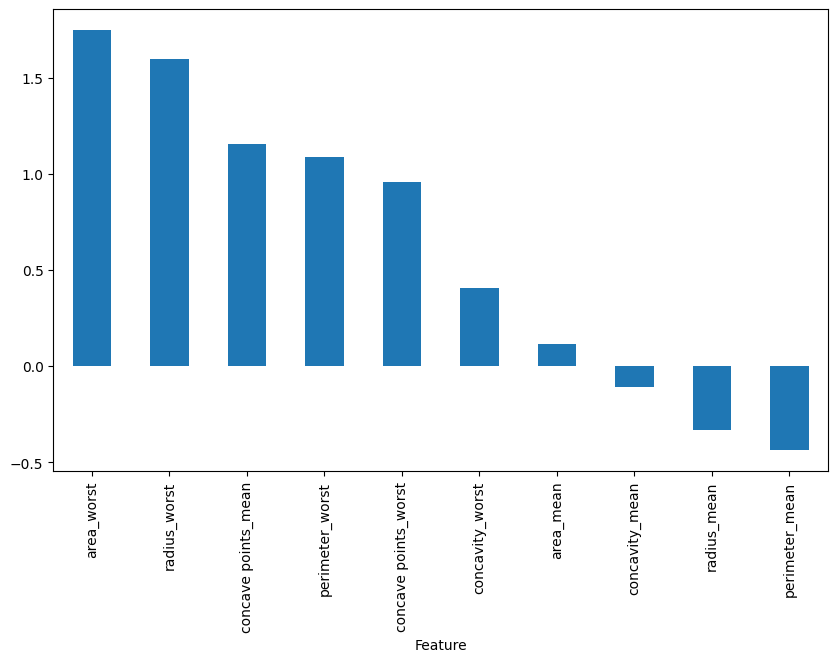

In [ ]:
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)
coef_df.plot(kind='bar', x='Feature', y='Coefficient', legend=False, figsize=(10,6))


In [ ]:
# --------------------------------------------------------------
# 📦 Imports
# --------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# 🧩 Split Data
# --------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------------------------------------------
# ⚖️ Scale + Resample
# --------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())

# --------------------------------------------------------------
# 💡 Model Choice (Logistic Regression for higher recall)
# --------------------------------------------------------------

log_reg = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_res, y_train_res)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# --------------------------------------------------------------
# 🧠 Prediction + Threshold Adjustment
# --------------------------------------------------------------
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# 🔥 LOWER THRESHOLD for better recall
threshold = 0.3  # tune this value (0.2–0.4) to find best recall
y_pred = (y_prob >= threshold).astype(int)

# --------------------------------------------------------------
# 📊 Evaluation
# --------------------------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall (after threshold={threshold}): {recall:.3f}\n")

print("Classification Report (Recall Optimized):")
print(classification_report(y_test, y_pred))

# --------------------------------------------------------------
# 🔍 Confusion Matrix
# --------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------------------------------------------------
# 📉 ROC Curve
# --------------------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='red', label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('ROC Curve - Diabetes/Heart Risk')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# --------------------------------------------------------------
# 🔁 Cross-Validation Recall
# --------------------------------------------------------------
cv_recall = cross_val_score(best_model, X_train_res, y_train_res, cv=5, scoring='recall')
print(f"Cross-Validation Recall: {cv_recall.mean():.3f} ± {cv_recall.std():.3f}")


NameError: name 'X' is not defined

In [30]:
for t in [0.2, 0.30, 0.34, 0.4, 0.5]:
    y_pred_t = (y_prob >= t).astype(int)
    print(f"Threshold: {t}")
    print(classification_report(y_test, y_pred_t))
    print("-" * 40)


Threshold: 0.2
              precision    recall  f1-score   support

           0       1.00      0.09      0.17       100
           1       0.37      1.00      0.54        54

    accuracy                           0.41       154
   macro avg       0.69      0.55      0.35       154
weighted avg       0.78      0.41      0.30       154

----------------------------------------
Threshold: 0.3
              precision    recall  f1-score   support

           0       0.97      0.33      0.49       100
           1       0.44      0.98      0.61        54

    accuracy                           0.56       154
   macro avg       0.71      0.66      0.55       154
weighted avg       0.79      0.56      0.53       154

----------------------------------------
Threshold: 0.34
              precision    recall  f1-score   support

           0       0.96      0.46      0.62       100
           1       0.49      0.96      0.65        54

    accuracy                           0.64       154


After SMOTE: {0: 400, 1: 400}
Fitting 3 folds for each of 288 candidates, totalling 864 fits


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:26:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5, 'subsample': 0.8}
Accuracy: 0.708
Recall (after threshold=0.7): 0.926

Classification Report (Recall Optimized):
              precision    recall  f1-score   support

           0       0.94      0.59      0.72       100
           1       0.55      0.93      0.69        54

    accuracy                           0.71       154
   macro avg       0.74      0.76      0.71       154
weighted avg       0.80      0.71      0.71       154



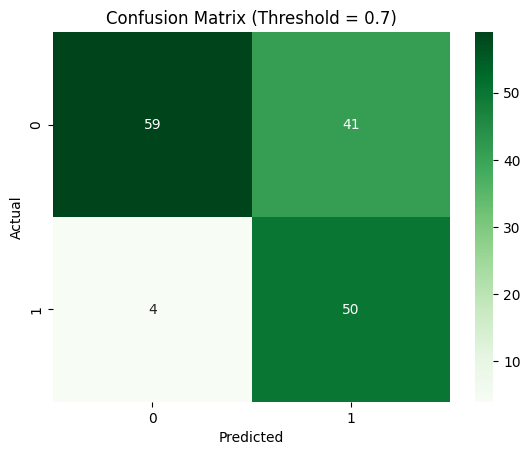

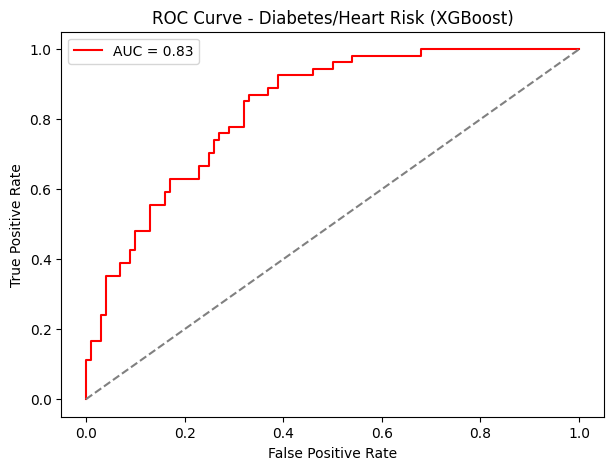

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:26:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:26:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:26:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Cross-Validation Recall: 0.988 ± 0.014


In [5]:
# --------------------------------------------------------------
# 📦 Imports
# --------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_curve, roc_auc_score, accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# 🧩 Split Data
# --------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------------------------------------------
# ⚖️ Scale + Resample
# --------------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())

# --------------------------------------------------------------
# 💡 Model Choice (XGBoost for better recall)
# --------------------------------------------------------------
xgb_model = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=1  # will be tuned
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 3, 5]  # helps recall on imbalanced data
}

grid_search = GridSearchCV(
    xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_res, y_train_res)
best_model1 = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# --------------------------------------------------------------
# 🧠 Prediction + Threshold Adjustment
# --------------------------------------------------------------
y_prob = best_model1.predict_proba(X_test_scaled)[:, 1]

# 🔥 LOWER THRESHOLD for higher recall
threshold = 0.70  # adjust between 0.3–0.4 for optimal recall
y_pred = (y_prob >= threshold).astype(int)

# --------------------------------------------------------------
# 📊 Evaluation
# --------------------------------------------------------------
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Recall (after threshold={threshold}): {recall:.3f}\n")

print("Classification Report (Recall Optimized):")
print(classification_report(y_test, y_pred))

# --------------------------------------------------------------
# 🔍 Confusion Matrix
# --------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------------------------------------------------
# 📉 ROC Curve
# --------------------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='red', label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('ROC Curve - Diabetes/Heart Risk (XGBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# --------------------------------------------------------------
# 🔁 Cross-Validation Recall
# --------------------------------------------------------------
cv_recall = cross_val_score(best_model1, X_train_res, y_train_res, cv=5, scoring='recall')
print(f"Cross-Validation Recall: {cv_recall.mean():.3f} ± {cv_recall.std():.3f}")


In [6]:
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model1, file)
